In [1]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [2]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from BuildingOccupancy import Person, Meeting, WeeklyMeeting, OneTimeMeeting, BuildingOccupancy
from DefaultBuildings import Building_5ZoneAirCooled
from Agents import agent_constructor
from CentralController import ddpg_episode_mc
import RLCritics
import StateUtilities as SU

In [4]:
import visualization_helper as vh

In [5]:
dirname1 = '../checkpoints/b011/' # baseline chicago
dirname2 = '../checkpoints/b012/' # baseline chicago, modified setpoints

multioutput = True

In [6]:
dfs1 = vh.convert_sqlite_to_df(dirname1)

Table eees convertet to a pandas dataframe.
Table eeesea convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [7]:
dfs2 = vh.convert_sqlite_to_df(dirname2)

Table eees convertet to a pandas dataframe.
Table eeesea convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


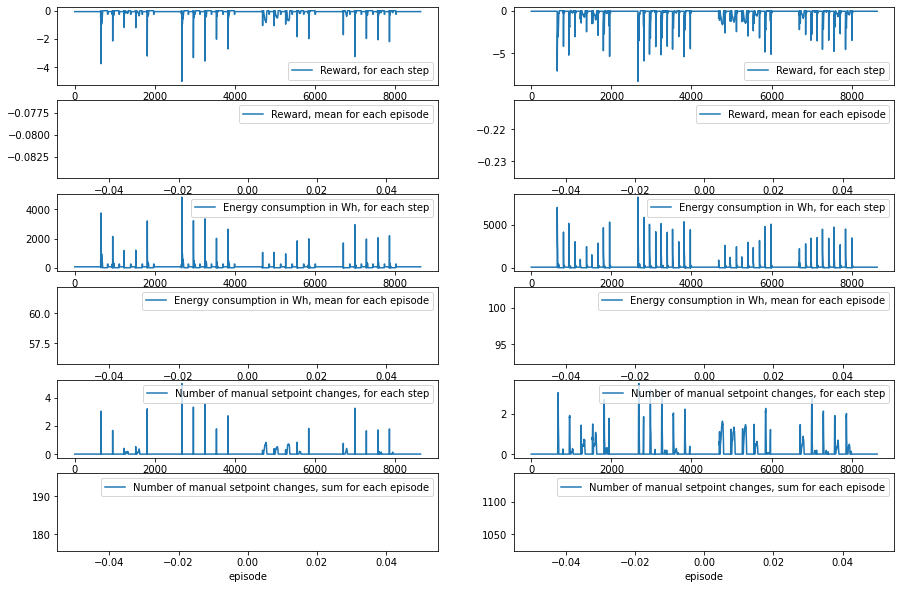

In [8]:
_, axes = plt.subplots(nrows=6, ncols=2, figsize=(15,10), sharex=False)
vh.plot_eees(dfs1, axes[:, 0])
vh.plot_eees(dfs2, axes[:, 1])

<h3>Details: Temperatur Setpoints</h3>

In [9]:
selected_episode = 0
selected_week    = datetime.datetime(2017, 7, 1)
selected_week2   = datetime.datetime(2017, 7, 1)

subdfs1 = vh.select_week_and_episode(dfs1, selected_episode, selected_week)
subdfs2 = vh.select_week_and_episode(dfs2, selected_episode, selected_week2)

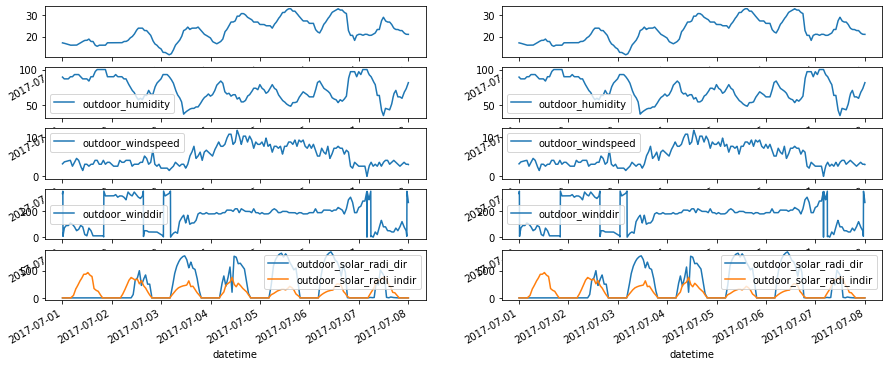

In [10]:
_, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,6))
vh.plot_sees(subdfs1, axes[:, 0])
vh.plot_sees(subdfs2, axes[:, 1])

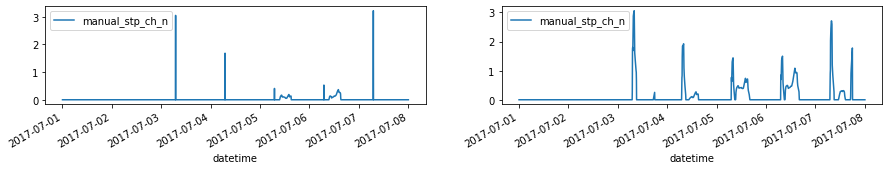

In [11]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,2))
vh.plot_eees_only_mstpc(subdfs1, axes[0])
vh.plot_eees_only_mstpc(subdfs2, axes[1])

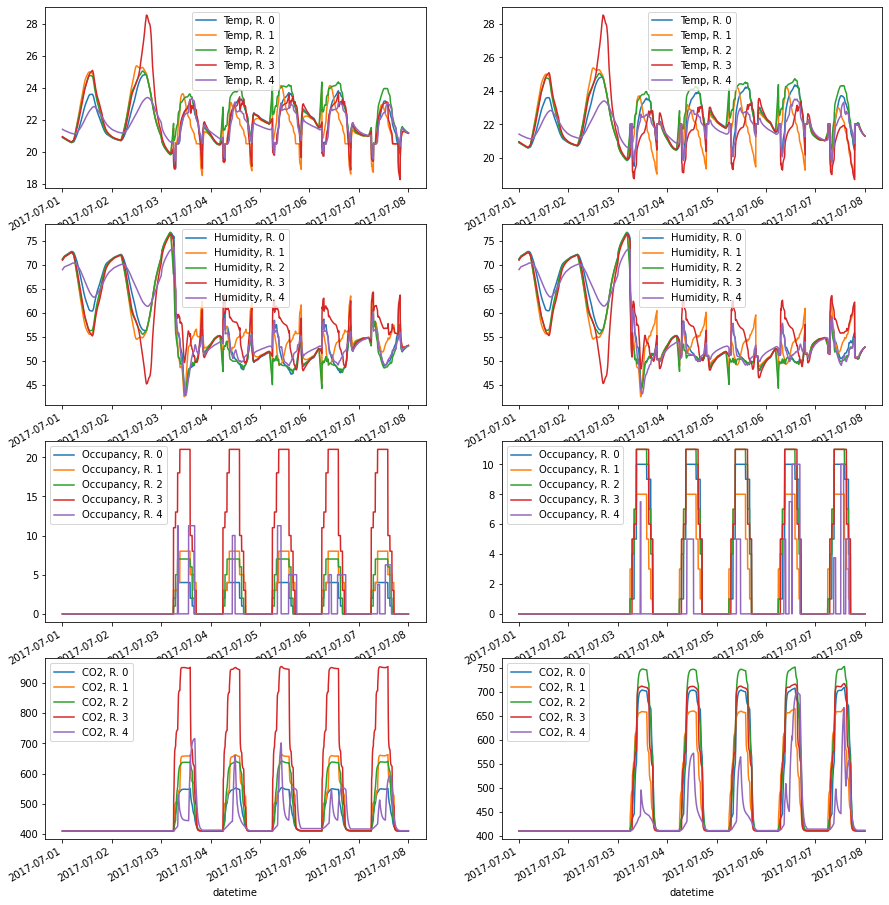

In [12]:
_, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,17))
vh.plot_seeser_all_rooms(subdfs1, axes[:, 0])
vh.plot_seeser_all_rooms(subdfs2, axes[:, 1])
# for individual rooms use plot_seeser(subdfs, room_id, ax)

In [13]:
subdfs1_rooms  = subdfs1["seeser"].loc[:, "room"].unique()
subdfs1_agents = subdfs1["seesea"].loc[:, "agent_nr"].unique()
subdfs2_rooms  = subdfs2["seeser"].loc[:, "room"].unique()
subdfs2_agents = subdfs2["seesea"].loc[:, "agent_nr"].unique()
print("Available Room  IDs in subdfs1: ", subdfs1_rooms)
print("Available Agent IDs in subdfs1: ", subdfs1_agents, "\n")
print("Available Room  IDs in subdfs2: ", subdfs1_rooms)
print("Available Agent IDs in subdfs2: ", subdfs1_agents)

Available Room  IDs in subdfs1:  [0 1 2 3 4]
Available Agent IDs in subdfs1:  [0 1 2 3 4] 

Available Room  IDs in subdfs2:  [0 1 2 3 4]
Available Agent IDs in subdfs2:  [0 1 2 3 4]


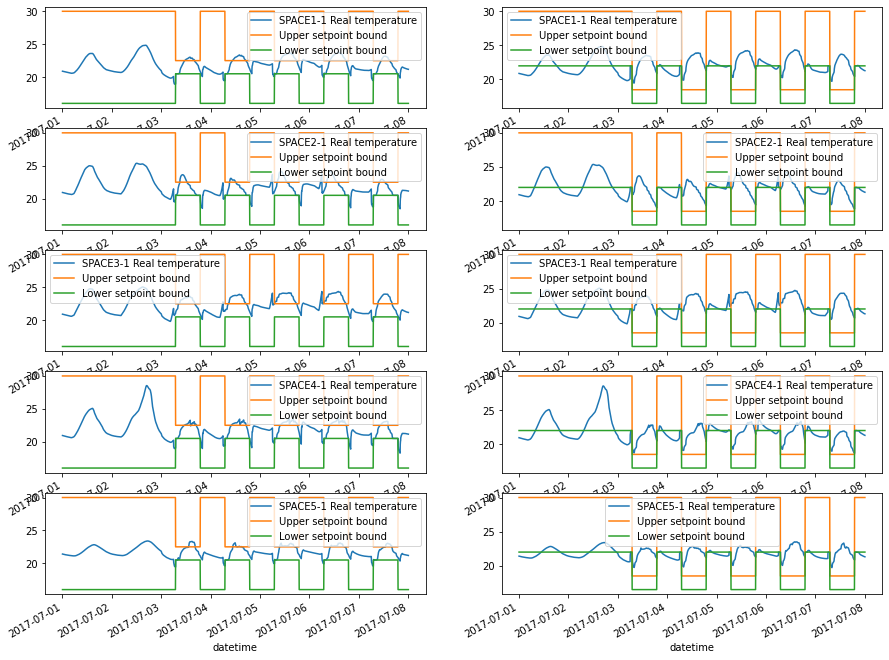

In [14]:
_, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,12))
for idx, roomid, agentid in zip(range(len(subdfs1_rooms)), subdfs1_rooms, subdfs1_agents):
    vh.plot_room_temp_agent_setpoint(subdfs1, roomid, roomid+1, agentid, axes[idx, 0])
for idx, roomid, agentid in zip(range(len(subdfs2_rooms)), subdfs2_rooms, subdfs2_agents):
    vh.plot_room_temp_agent_setpoint(subdfs2, roomid, roomid+1, agentid, axes[idx, 1])

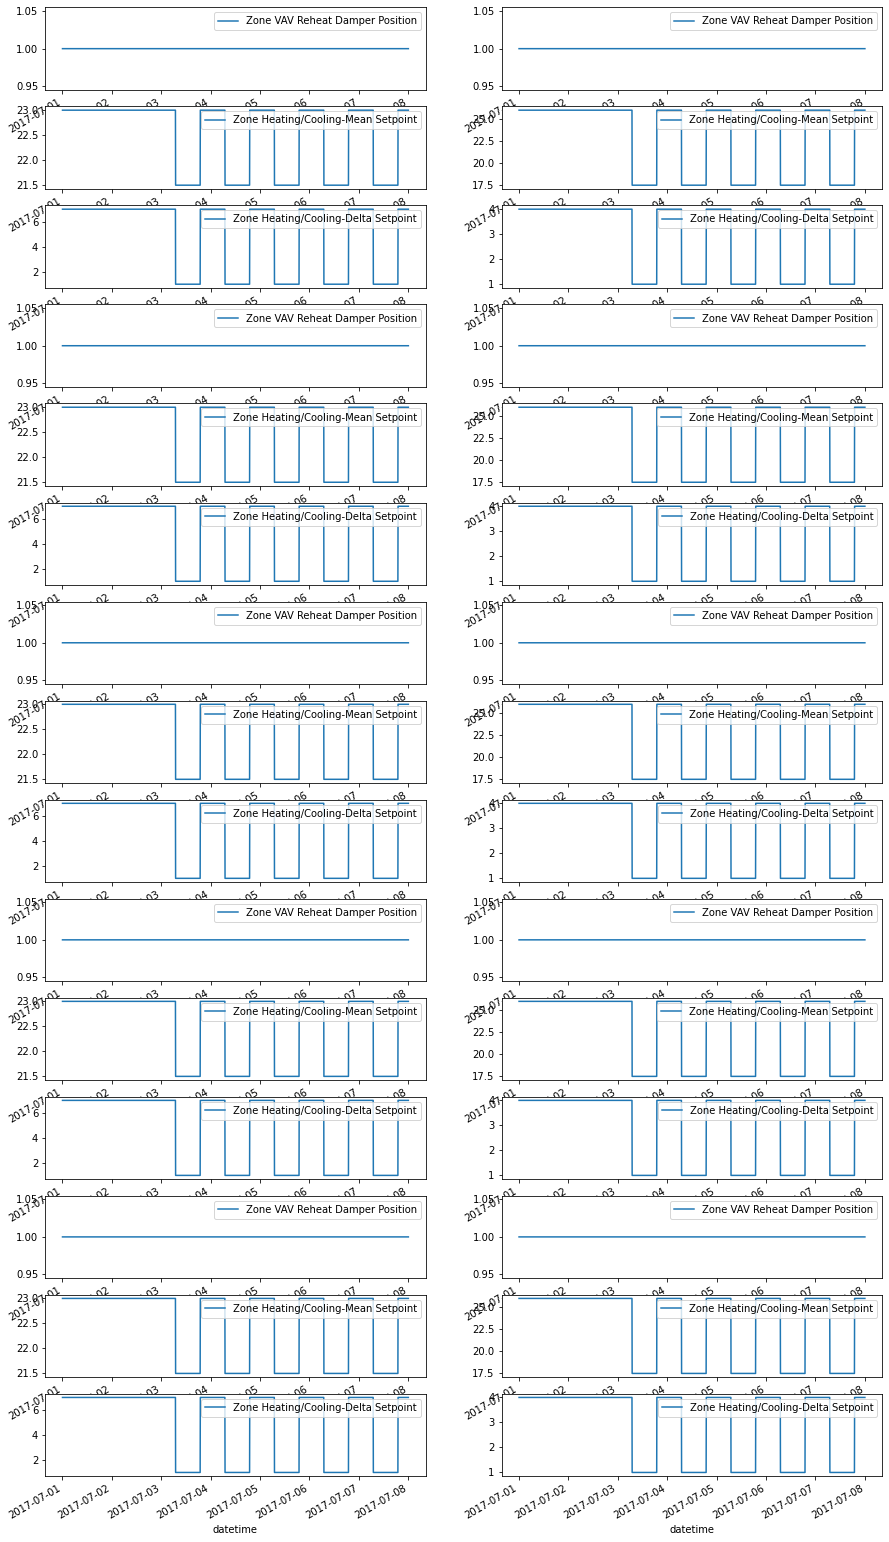

In [15]:
_, axes = plt.subplots(nrows=15, ncols=2, figsize=(15,30))
for a in axes.flatten():
    a.ticklabel_format(useOffset=False, style='plain')
vh.plot_seesea(subdfs1, axes[:, 0])
vh.plot_seesea(subdfs2, axes[:, 1])

<h3>Details for a day</h3>

In [16]:
selected_episode    = 0
selected_period     = datetime.datetime(2017, 7, 3)
selected_period_end = datetime.datetime(2017, 7, 4)

subdfs1 = vh.select_week_and_episode(dfs1, selected_episode, selected_period, selected_period_end)
subdfs2 = vh.select_week_and_episode(dfs2, selected_episode, selected_period, selected_period_end)

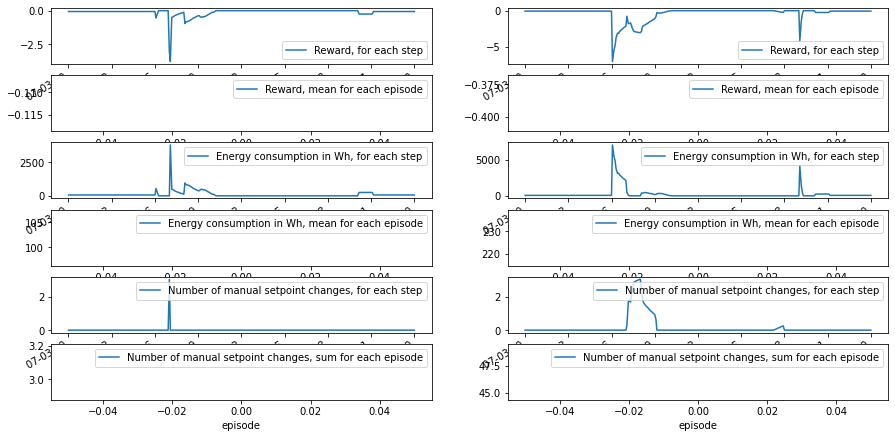

In [17]:
_, axes = plt.subplots(nrows=6, ncols=2, figsize=(15,8))
vh.plot_eees(subdfs1, axes[:, 0]) #['eees']['reward'].plot()
vh.plot_eees(subdfs2, axes[:, 1])

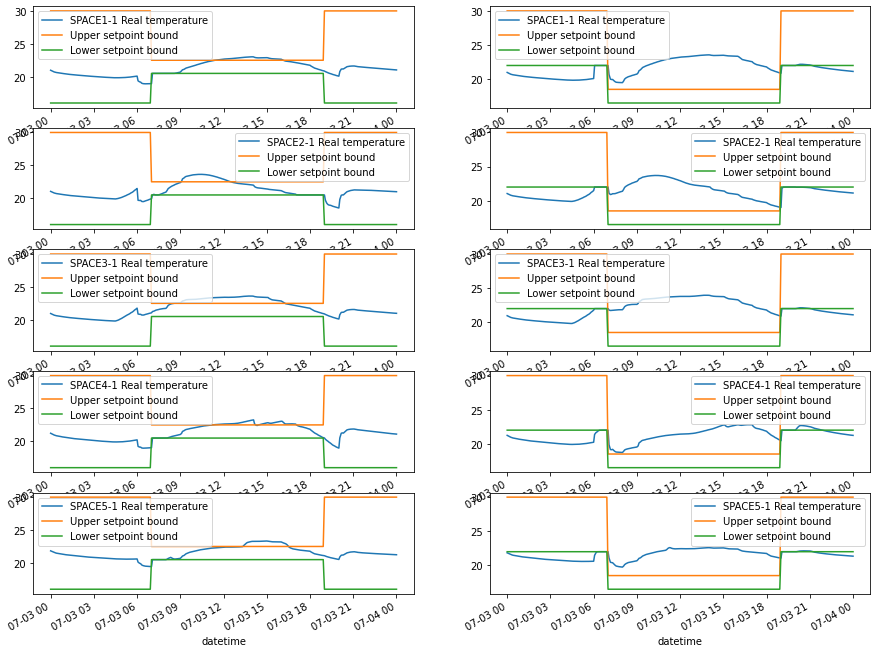

In [18]:
_, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,12))
for idx, roomid, agentid in zip(range(len(subdfs1_rooms)), subdfs1_rooms, subdfs1_agents):
    vh.plot_room_temp_agent_setpoint(subdfs1, roomid, roomid+1, agentid, axes[idx, 0])
for idx, roomid, agentid in zip(range(len(subdfs2_rooms)), subdfs2_rooms, subdfs2_agents):
    vh.plot_room_temp_agent_setpoint(subdfs2, roomid, roomid+1, agentid, axes[idx, 1])